In [10]:
from torchvision import datasets
from torchvision.transforms import ToTensor

In [16]:
train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = ToTensor(),
    download = True
)

test_data = datasets.MNIST(
    root = "data",
    train = False,
    transform = ToTensor(),
    download = True
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 30.0MB/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.06MB/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 9.11MB/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 2.52MB/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [17]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [18]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [19]:
from torch.utils.data import DataLoader

loaders = {
    'train': DataLoader(train_data, batch_size=100, shuffle=True, num_workers=1),
    'test': DataLoader(test_data, batch_size=100, shuffle=True, num_workers=1)
}

In [47]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


class CNN(nn.Module):

  def __init__(self):
    super(CNN, self).__init__()

    self.conv1 = nn.Conv2d(1, 10, kernel_size = 5)
    self.conv2 = nn.Conv2d(10, 20, kernel_size = 5)
    self.conv2_drop = nn.Dropout2d()
    self.fc1 = nn.Linear(320, 50)
    self.fc2 = nn.Linear(50, 10)

  def forward(self, x):
    x = F.relu(F.max_pool2d(self.conv1(x), 2))
    x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
    x = x.view(-1,320)
    x = F.relu(self.fc1(x))
    x = F.dropout(x, training=self.training)
    x = self.fc2(x)
    return x



In [48]:
import torch
import torch.nn.functional as F
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = CNN().to(device)

optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(loaders['train']):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)

        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()

        if batch_idx % 20 == 0:
            print(f"Train Epoch: {epoch} [{batch_idx * len(data)}/{len(loaders['train'].dataset)} "
                  f"({100. * batch_idx / len(loaders['train']):.0f}%)]\tLoss: {loss.item():.6f}")


def test():
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in loaders['test']:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += loss_fn(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
    test_loss /= len(loaders['test'].dataset)

    print(f"\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(loaders['test'].dataset)} "
          f"({100. * correct / len(loaders['test'].dataset):.0f}%)\n")

In [49]:
for epoch in range(1, 11):
  train(epoch)
  test()

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.303339
Train Epoch: 1 [2000/60000 (3%)]	Loss: 2.207571
Train Epoch: 1 [4000/60000 (7%)]	Loss: 1.752109
Train Epoch: 1 [6000/60000 (10%)]	Loss: 1.134335
Train Epoch: 1 [8000/60000 (13%)]	Loss: 0.898185
Train Epoch: 1 [10000/60000 (17%)]	Loss: 0.871289
Train Epoch: 1 [12000/60000 (20%)]	Loss: 0.670397
Train Epoch: 1 [14000/60000 (23%)]	Loss: 0.825730
Train Epoch: 1 [16000/60000 (27%)]	Loss: 0.702639
Train Epoch: 1 [18000/60000 (30%)]	Loss: 0.687223
Train Epoch: 1 [20000/60000 (33%)]	Loss: 0.460911
Train Epoch: 1 [22000/60000 (37%)]	Loss: 0.617886
Train Epoch: 1 [24000/60000 (40%)]	Loss: 0.595688
Train Epoch: 1 [26000/60000 (43%)]	Loss: 0.530185
Train Epoch: 1 [28000/60000 (47%)]	Loss: 0.487166
Train Epoch: 1 [30000/60000 (50%)]	Loss: 0.423397
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.445785
Train Epoch: 1 [34000/60000 (57%)]	Loss: 0.692112
Train Epoch: 1 [36000/60000 (60%)]	Loss: 0.558272
Train Epoch: 1 [38000/60000 (63%)]	Loss: 0.364419
Train Epoch

2


<function matplotlib.pyplot.show(close=None, block=None)>

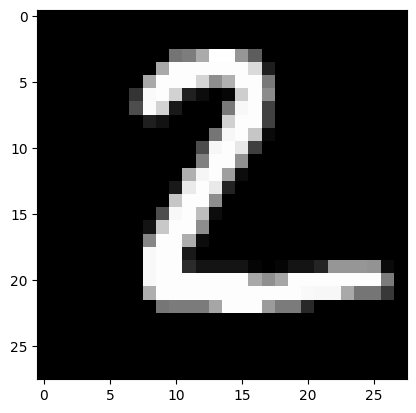

In [53]:
import matplotlib.pyplot as plt


model.eval()

data, target = test_data[1]

data = data.unsqueeze(0).to(device)

output = model(data)

pred = output.argmax(dim=1, keepdim=True).item()

print(pred)

image = data.squeeze(0).squeeze(0).cpu().numpy()

plt.imshow(image, cmap='gray')

plt.show